In [73]:
import kagglehub
# Download the "ashydv/advertising-dataset" from Kaggle
path = kagglehub.dataset_download("ashydv/advertising-dataset")
print(f"Dataset downloaded to: {path}")


Dataset downloaded to: /home/manousos/.cache/kagglehub/datasets/ashydv/advertising-dataset/versions/1


In [74]:
import os
files = os.listdir(path)
print(f"Files in folder: {files}")

csv_file =  [file for file in files if file.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file) # Full path to the CSV file
print(f"CSV file path: {csv_path}")


Files in folder: ['advertising.csv']
CSV file path: /home/manousos/.cache/kagglehub/datasets/ashydv/advertising-dataset/versions/1/advertising.csv


In [75]:
import pandas as pd

data = pd.read_csv(csv_path)
print(data.head()) #first 5 rows
print(data.info()) #data summary
print(data.describe()) #statistical summary
print(data.isnull().sum()) #check for missing values

# As we can see, there are no missing values in the dataset and we are good to go without cleaning the data.



      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

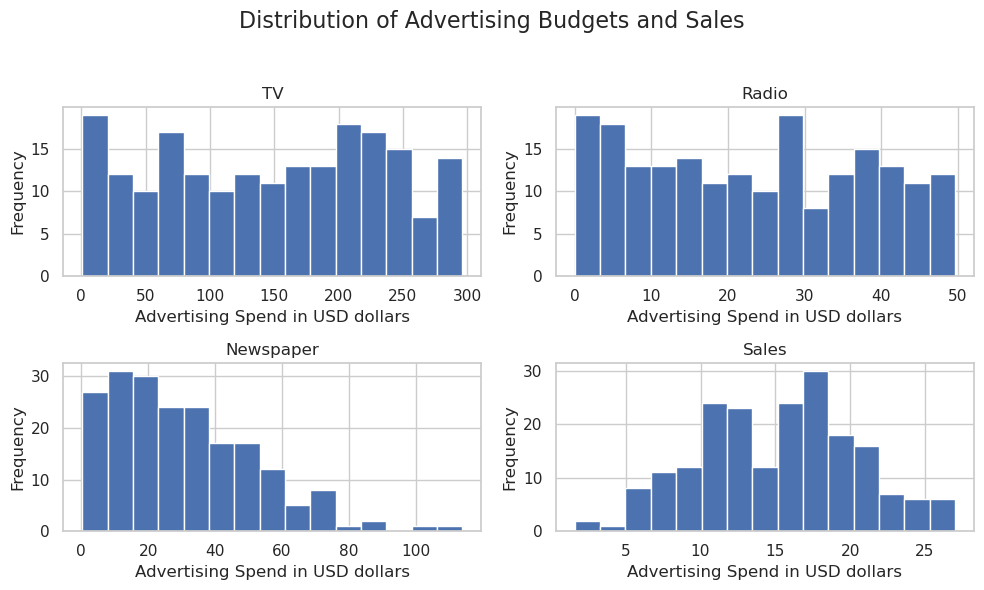

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid") # Set theme for plots

# Univariate Analysis
axes = data.hist(bins=15, figsize=(10,6), layout=(2,2)) # Create histograms for each feature
plt.suptitle("Distribution of Advertising Budgets and Sales", fontsize=16)

for ax in axes.ravel():
    ax.set_xlabel("Advertising Spend in USD dollars")
    ax.set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

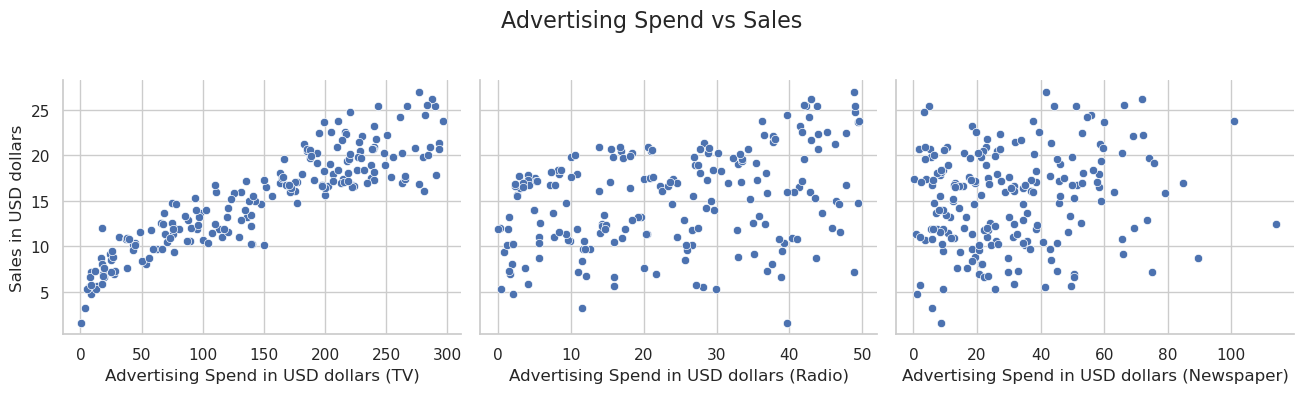

In [ ]:
# Bivariate Analysis
# Scatter plots to see relationships between each advertising channel and sales
pair = sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=4, aspect=1.1, kind='scatter') # Create scatter plots for each advertising channel vs sales
pair.figure.suptitle("Advertising Spend vs Sales", fontsize=16)

for ax in pair.axes.ravel():
    ax.set_xlabel(f"Advertising Spend in USD dollars ({ax.get_xlabel()})")
    ax.set_ylabel("Sales in USD dollars")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


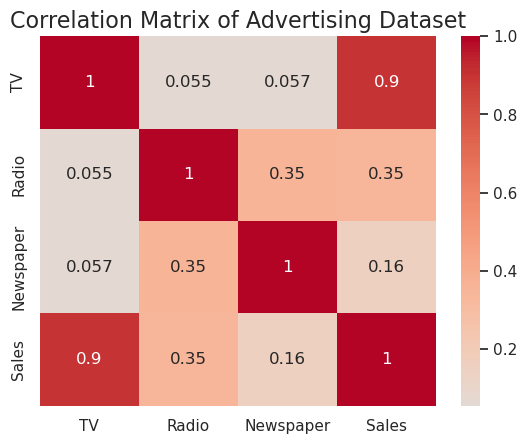

In [ ]:
# Correlation Matrix
sns.heatmap(data.corr(),annot=True, cmap='coolwarm', center=0) # Create heatmap of correlations
plt.title("Correlation Matrix of Advertising Dataset", fontsize=16)
plt.show() 
# From the heatmap, we can see that TV and Radio advertising have a strong positive correlation with sales, while Newspaper advertising has a weak correlation with sales.

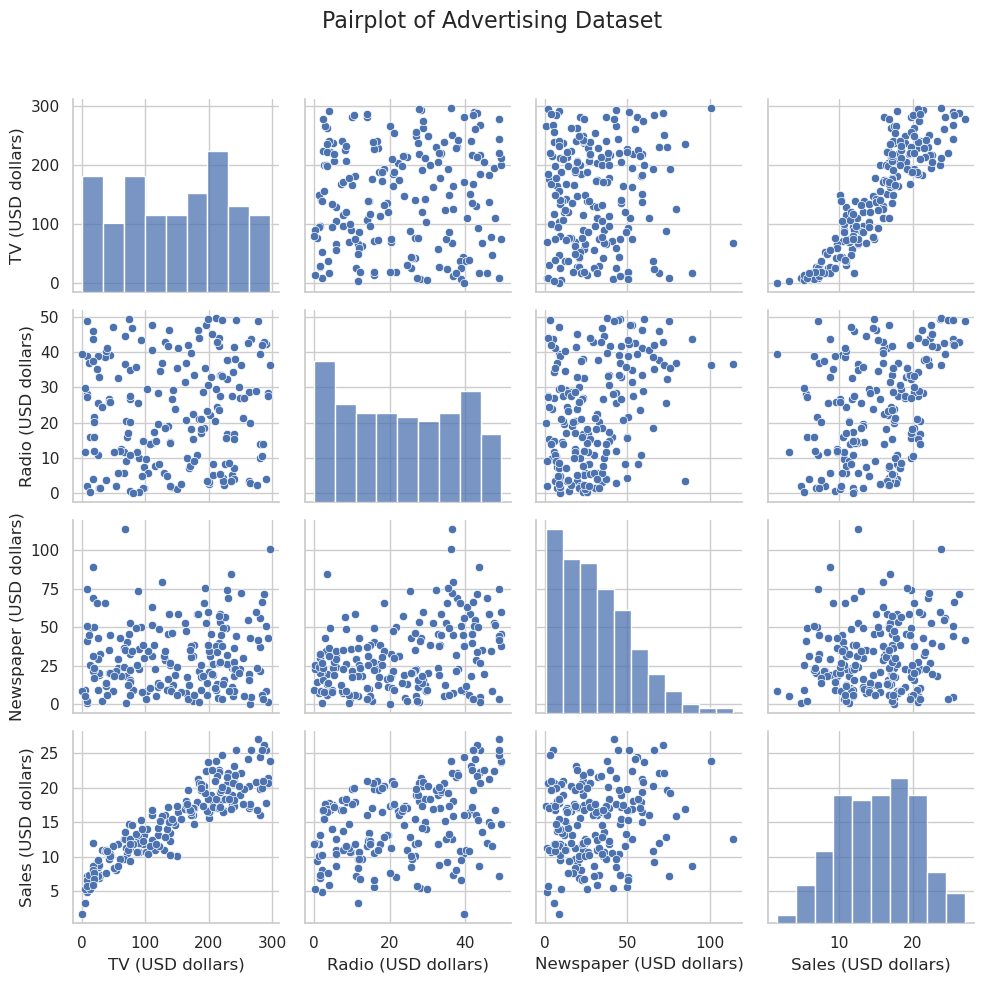

In [79]:
# Pairplot to see relationships between all features histogram for frequency vs sales and scatter plots for relationships between features
pair = sns.pairplot(data) 
pair.figure.suptitle("Pairplot of Advertising Dataset", fontsize=16)
for ax in pair.axes.flatten():
    ax.set_xlabel(f"{ax.get_xlabel()} (USD dollars)")
    ax.set_ylabel(f"{ax.get_ylabel()} (USD dollars)")
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to fit title left, right, top, bottom
plt.show()